In [1]:
import sys
sys.path.append("code")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{lmodern}']

from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize
    
%matplotlib notebook

%matplotlib notebook

%load_ext autoreload
%autoreload 2

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  


1.0708886424405295


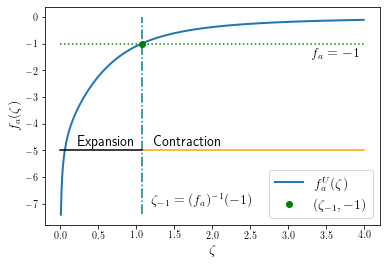

In [2]:
from scipy.optimize import newton

a = 1.576943460405378
b = 0.8950608781227859

grad_coeff = lambda dist: -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))

def umap_eq(x):
    return grad_coeff(x)+1.0
def humap_eq(x):
    return grad_coeff(x)+4/3

umap_a = [-1, -1]
umap_x = [0.0, 4.0]

umap_point = newton(umap_eq,0.5)
print(umap_point)

humap_a = [-4/3, -4/3]

dists=np.arange(0.01,4,0.01)
gcs = grad_coeff(dists)

plt.figure()
plt.plot(dists,gcs, lw=2.0, label=r'$f_a^U(\zeta)$')
plt.plot(umap_x,umap_a, c='g', ls=':')
plt.plot([umap_point,umap_point], [-7.4, 0], c='teal', ls='-.') 
plt.plot(umap_point,-1.0,'go', label=r'$(\zeta_{-1}, -1)$')

loc_umap = -5
plt.plot([umap_point, 4.0], [loc_umap, loc_umap], c='orange')
plt.text(umap_point+.15, loc_umap+0.15, 'Contraction', fontsize=14)

plt.plot([0, umap_point], [loc_umap, loc_umap], c='black')
plt.text(0+0.24, loc_umap+0.15, 'Expansion', fontsize=14)


plt.text(3.3, -1.5, r'$f_a=-1$', fontsize=14)
plt.text(1.2, -7.0, r'$\zeta_{-1}=(f_a)^{-1}(-1)$', fontsize=14)


plt.xlabel(r'$\zeta$', fontsize=14)
plt.ylabel(r'$f_a(\zeta)$', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
#plt.grid('on')
#plt.ylim([-4,1])
#plt.savefig('Fig_1/f_a_umap_plot.svg', dpi=400, bbox_inches='tight')

1.0708886424405295
0.853891421666223


(-7.7, 0.33)

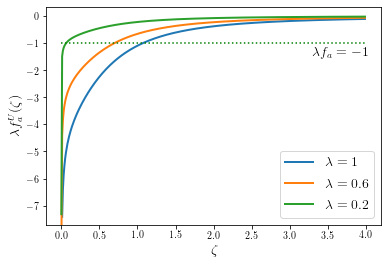

In [3]:
from scipy.optimize import newton

a = 1.576943460405378
b = 0.8950608781227859

grad_coeff = lambda dist: -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))

def umap_eq(x):
    return grad_coeff(x)+1.0
def humap_eq(x):
    return grad_coeff(x)+4/3



umap_a = [-1, -1]
umap_x = [0.0, 4.0]

umap_point = newton(umap_eq,0.5)
print(umap_point)

humap_point = newton(humap_eq,0.5)
print(humap_point)

humap_a = [-4/3, -4/3]
humap_x = [0.0, 4.0]

dists=np.arange(0.01,4,0.01)
gcs = grad_coeff(dists)

dists6=np.arange(0.0005,4,0.01)
gcs6 = 0.6*grad_coeff(dists6)

dists2=np.arange(0.000005,4,0.01)
gcs2 = 0.2*grad_coeff(dists2)


plt.figure()
plt.plot(dists,gcs, lw=2.0, label=r'$\lambda=1$')
plt.plot(dists6,gcs6, lw=2.0, label=r'$\lambda=0.6$')
plt.plot(dists2,gcs2, lw=2.0, label=r'$\lambda=0.2$')
plt.plot(umap_x,umap_a, c='g', ls=':')

plt.text(3.3, -1.5, r'$\lambda f_a=-1$', fontsize=14)

plt.xlabel(r'$\zeta$', fontsize=14)
plt.ylabel(r'$\lambda f_a^U(\zeta)$', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
#plt.grid('on')
plt.ylim([-7.70,0.33])
#plt.savefig('Fig_1/f_a_umap_plot_var_lambda.svg', bbox_inches='tight') #, dpi=200)

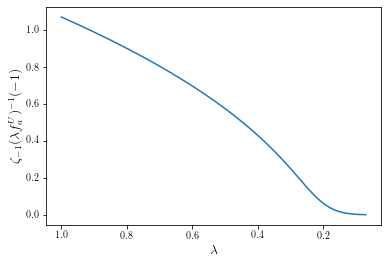

In [4]:
dx = 0.01
lambdas = np.arange(0.07,1+dx,dx)

upts = []

for lr in lambdas:

    grad_coeff = lambda dist: lr * -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))

    def umap_eq(x):
        return grad_coeff(x)+1.0
    
    umap_point = newton(umap_eq, 0.001)
    upts.append(umap_point)

upts = np.array(upts)
plt.figure()
plt.plot(lambdas, upts)

plt.ylabel(r'$\zeta_{-1}(\lambda f_a^U)^{-1}(-1)$', fontsize=14)
plt.xlabel(r'$\lambda$',fontsize=14)
plt.gca().invert_xaxis()
#plt.savefig('Fig_1/lambda_f_inv.svg', bbox_inches='tight')

1.0708886424405295


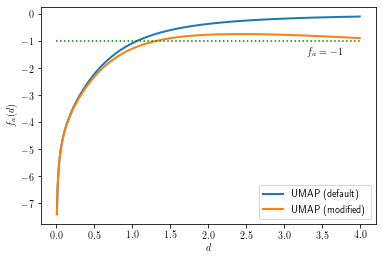

In [10]:
from scipy.optimize import newton

a = 1.576943460405378
b = 0.8950608781227859

grad_coeff = lambda dist: -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))

def umap_eq(x):
    return grad_coeff(x)+1.0

umap_a = [-1, -1]
umap_x = [0.0, 4.0]

umap_point = newton(umap_eq,0.5)
print(umap_point)

dists=np.arange(0.01,4,0.01)
gcs = grad_coeff(dists)

plt.figure()
plt.plot(dists,gcs, lw=2.0, label=r'UMAP (default)')
plt.plot(dists,gcs-0.2*dists, lw=2.0, label=r'UMAP (modified)')
plt.plot(umap_x,umap_a, c='g', ls=':')

plt.text(3.3, -1.5, r'$f_a=-1$')

plt.xlabel(r'$d$')
plt.ylabel(r'$f_a(d)$')
plt.legend(loc='lower right')
#plt.savefig('Fig_1/f_a_umap_modified_plot.png', dpi=200)

<h1> Choice of Min Distance</h1>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9921756197688717 1.1122533842193434


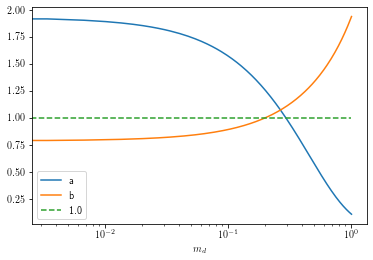

In [6]:
from scipy.optimize import curve_fit

def find_ab_params(min_dist):
    """Fit a, b params for the differentiable curve used in lower
    dimensional fuzzy simplicial complex construction. We want the
    smooth curve (from a pre-defined family with simple gradient) that
    best matches an offset exponential decay.
    ####code adapted from UMAP github repo
    """

    def curve(x, a, b):
        return 1.0 / (1.0 + a * x ** (2 * b))

    xv = np.linspace(0, 3, 300)
    yv = np.zeros(xv.shape)
    yv[xv < min_dist] = 1.0
    yv[xv >= min_dist] = np.exp(-(xv[xv >= min_dist] - min_dist))
    params, covar = curve_fit(curve, xv, yv)
    return params[0], params[1]

def derivative_f_zeta(zeta,a,b):
    pass

a_1,b_1 = find_ab_params(0.1)

min_dists = np.linspace(0,1.01,300)

a_s = []
b_s = []

for md in min_dists:
    a_x, b_x = find_ab_params(md)
    a_s.append(a_x)
    b_s.append(b_x)
    
plt.figure()
plt.plot(min_dists, a_s, label='a')
plt.plot(min_dists, b_s, '-', label='b')
plt.plot([0,1.01], [1,1], '--', label='1.0')

plt.xlabel(r'$m_d$')

plt.xscale('log')

plt.legend()

plt.savefig('ab_plot.eps')

a_m,b_m = find_ab_params(0.3)
print(a_m,b_m)

<h1>Kernel</h1>

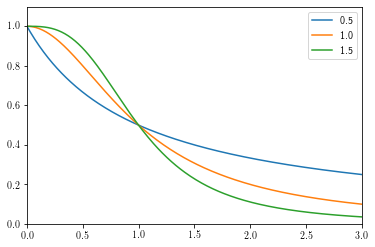

In [7]:
def kernel_fn(a,b,d):
    return 1/(1+a*d**(2*b))

af = 1
bf = 1
df = np.linspace(0,3,300)
kf_1 = kernel_fn(af,0.5,df)
kf_2 = kernel_fn(af,1,df)
kf_3 = kernel_fn(af,1.5,df)

plt.figure()
plt.plot(df,kf_1,label='0.5')
plt.plot(df,kf_2,label='1.0')
plt.plot(df,kf_3,label='1.5')
plt.xlim([0,3])
plt.ylim([0,1.1])

plt.legend()

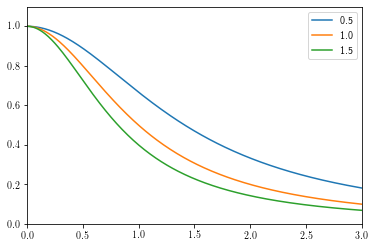

In [8]:
def kernel_fn(a,b,d):
    return 1/(1+a*d**(2*b))

af = 1.5
bf = 1
df = np.linspace(0,3,300)
kf_1 = kernel_fn(0.5,bf,df)
kf_2 = kernel_fn(1.0,bf,df)
kf_3 = kernel_fn(1.5,bf,df)

plt.figure()
plt.plot(df,kf_1,label='0.5')
plt.plot(df,kf_2,label='1.0')
plt.plot(df,kf_3,label='1.5')
plt.xlim([0,3])
plt.ylim([0,1.1])
plt.legend()

<h1>Repulsion Force</h1>

Text(0, 0.5, '$f_r(\\zeta)$')

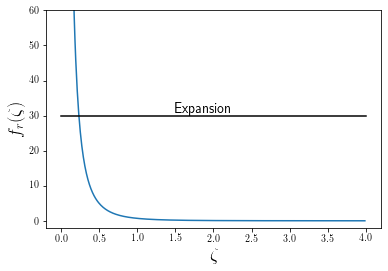

In [9]:
a = 1.576943460405378
b = 0.8950608781227859

def rep_ceoff_fun(dist,a,b):
    return 2*b / (dist**2 * (1 + a*dist**(2*b)))

dists=np.arange(0.01,4,0.01)
rcs1 = rep_ceoff_fun(dists, a, b)
rcs2 = rep_ceoff_fun(dists, a, 1.5)
rcs3 = rep_ceoff_fun(dists, a, 0.1)
rcs4 = rep_ceoff_fun(dists, a, 10)


plt.figure()
plt.plot(dists, rcs1, label=r'$f_r^U(\zeta)$')
plt.ylim([-2, 60])

loc_umap = 30

plt.plot([0, 4], [loc_umap, loc_umap], c='black')
plt.text(0+1.5, loc_umap+0.8, 'Expansion', fontsize=14)


#plt.grid('on')
plt.xlabel(r'$\zeta$', fontsize=18)
plt.ylabel(r'$f_r(\zeta)$', fontsize=18)
#plt.legend()
#plt.savefig('Fig_1/f_r_umap_plot.svg', bbox_inches='tight') #,dpi=400, transparent=True)